In [1]:
import librosa 
import pandas as pd 
import numpy as np
import random 
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense
from IPython.display import Audio

2025-04-18 16:57:23.394061: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-18 16:57:23.610926: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744995443.686028   98031 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744995443.706797   98031 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-18 16:57:23.886563: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
audiofiles = pd.read_csv('data/UrbanSound8K.csv')

In [3]:
audiofiles.head()

slice_file_name    fsID      start        end  salience  fold  classID  \
0  100032-3-0-0.wav  100032   0.000000   0.317551         1     5        3   
1  100648-1-0-0.wav  100648   4.823402   5.471927         2    10        1   
2  100648-1-1-0.wav  100648   8.998279  10.052132         2    10        1   
3  100648-1-2-0.wav  100648  16.699509  17.104837         2    10        1   
4  100648-1-3-0.wav  100648  17.631764  19.253075         2    10        1   

      class  
0  dog_bark  
1  car_horn  
2  car_horn  
3  car_horn  
4  car_horn

In [4]:
audiofiles.tail()

slice_file_name  fsID  start  end  salience  fold  classID  \
5887  weapon_gun_rattle_out_36.wav   156    0.0  3.0         1    11       13   
5888  weapon_gun_rattle_out_37.wav   157    0.0  2.0         1    11       13   
5889  weapon_gun_rattle_out_38.wav   158    0.0  2.0         1    11       13   
5890  weapon_gun_rattle_out_39.wav   159    0.0  3.0         1    11       13   
5891  weapon_gun_rattle_out_40.wav   160    0.0  2.0         1    11       13   

             class  
5887  weapon_clink  
5888  weapon_clink  
5889  weapon_clink  
5890  weapon_clink  
5891  weapon_clink

In [5]:
audiofiles.shape

(5892, 8)

In [10]:
audiofiles['class'].unique()

array(['dog_bark', 'car_horn', 'gun_shot', 'siren', 'engine_idling',
       'jackhammer', 'drilling', 'chainsaw', 'footsteps',
       'radio_human_sound', 'weapon_clink'], dtype=object)

In [11]:
audiofiles.describe()

fsID        start          end     salience         fold  \
count    5892.000000  5892.000000  5892.000000  5892.000000  5892.000000   
mean   108101.865580    45.809494    49.203828     1.307536     5.480312   
std     60197.904686    85.562086    85.723507     0.461512     2.941191   
min         1.000000     0.000000     0.105962     1.000000     1.000000   
25%     57696.000000     2.500000     6.000000     1.000000     3.000000   
50%    107357.000000    10.000000    13.500000     1.000000     5.000000   
75%    161129.000000    41.419740    44.921273     2.000000     8.000000   
max    209992.000000   600.125356   604.125356     2.000000    11.000000   

           classID  
count  5892.000000  
mean      5.252037  
std       2.300787  
min       1.000000  
25%       4.000000  
50%       5.000000  
75%       7.000000  
max      13.000000

In [14]:
audiofiles.notnull()

slice_file_name  fsID  start   end  salience  fold  classID  class
0                True  True   True  True      True  True     True   True
1                True  True   True  True      True  True     True   True
2                True  True   True  True      True  True     True   True
3                True  True   True  True      True  True     True   True
4                True  True   True  True      True  True     True   True
...               ...   ...    ...   ...       ...   ...      ...    ...
5887             True  True   True  True      True  True     True   True
5888             True  True   True  True      True  True     True   True
5889             True  True   True  True      True  True     True   True
5890             True  True   True  True      True  True     True   True
5891             True  True   True  True      True  True     True   True

[5892 rows x 8 columns]

In [15]:
list(np.where(audiofiles['class']=='chainsaw')[0])[0]

np.int64(5732)

In [16]:
idx = list(np.where(audiofiles['class'] == 'chainsaw')[0])[0]
arr = np.array(audiofiles['slice_file_name'])
fold = np.array(audiofiles['fold'])
cla = np.array(audiofiles['class'])

# Construct the file path
file_path = os.path.join("data", "fold" + str(fold[idx]), str(arr[idx]))
full_path = os.path.join("/home/sanjai/mlprojects/Unisys", file_path)

# Check if the file exists and load it
if os.path.exists(full_path):
    original_audio, sample_rate = librosa.load(full_path)
    display(Audio(data=original_audio, rate=sample_rate))
else:
    print(f"File not found at: {full_path}")

Text(0.5, 23.52222222222222, 'Time [secs]')

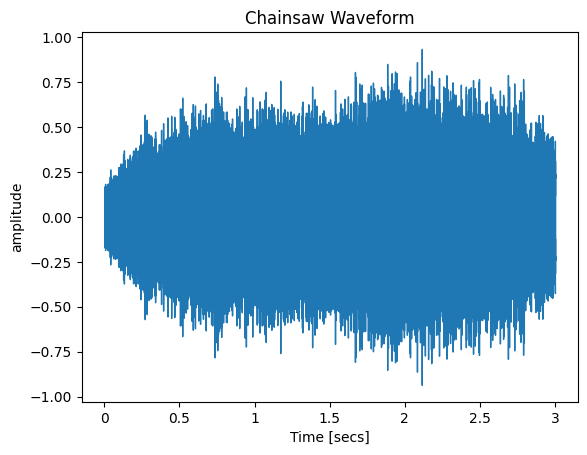

In [17]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(nrows=1, sharex=True)
librosa.display.waveshow(original_audio,sr=sample_rate,ax=ax)
ax.set(title='Chainsaw Waveform')
ax.set_ylabel('amplitude')
ax.set_xlabel('Time [secs]')

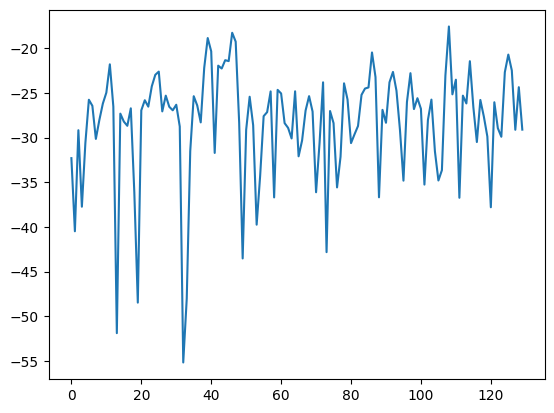

In [18]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(original_audio)),ref = np.max)
D.shape

plt.plot(D[100])

Text(0.5, 1.0, 'chainsaw')

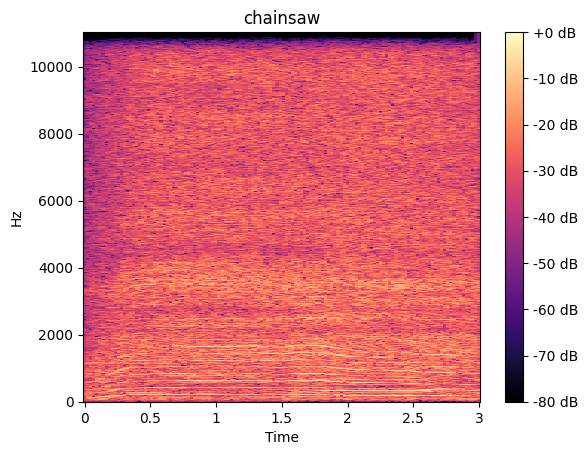

In [19]:
librosa.display.specshow(D,y_axis='linear',x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title(cla[idx])

Attempting to load: /home/sanjai/mlprojects/Unisys/data/fold9/157866-8-0-16.wav
Attempting to load: /home/sanjai/mlprojects/Unisys/data/fold5/203913-8-0-4.wav
Attempting to load: /home/sanjai/mlprojects/Unisys/data/fold1/118279-8-0-4.wav
Attempting to load: /home/sanjai/mlprojects/Unisys/data/fold8/113202-5-0-13.wav
Attempting to load: /home/sanjai/mlprojects/Unisys/data/fold5/66587-3-1-0.wav


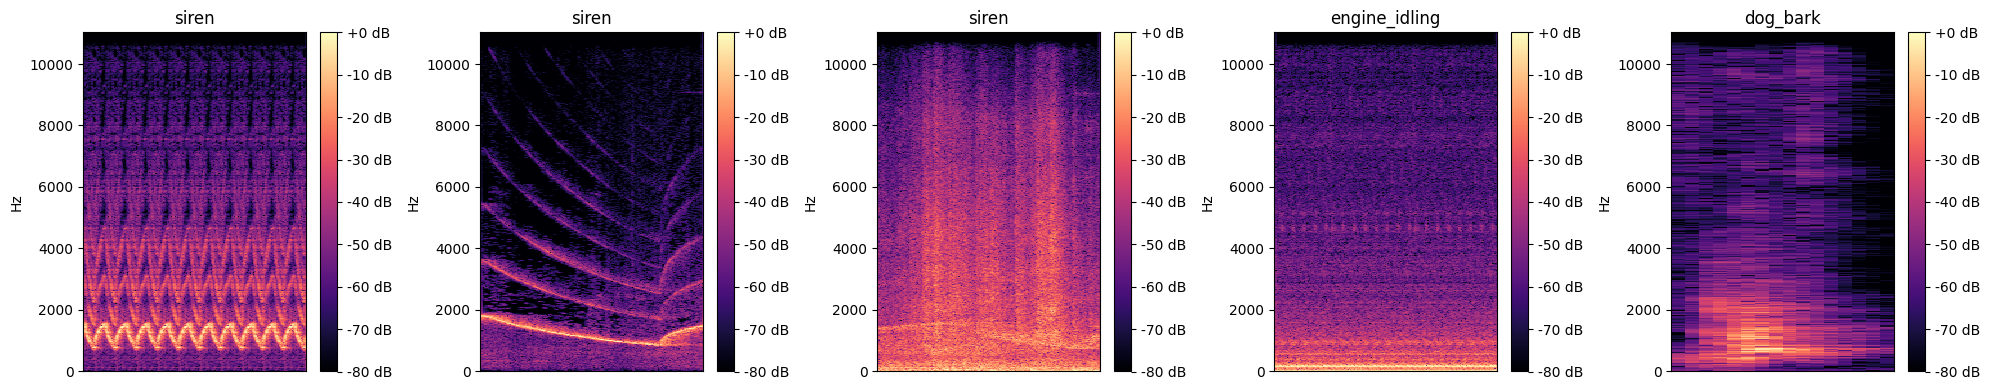

In [20]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os

# Randomly select 5 samples
rng = np.random.default_rng()
sample = rng.integers(0, audiofiles.shape[0], size=5)

# Create a single figure with 5 subplots
plt.figure(figsize=(20, 4))

for idx, i in enumerate(sample, 1):
    # Construct the correct local file path
    path = os.path.join("/home/sanjai/mlprojects/Unisys/data", "fold" + str(fold[i]), str(arr[i]))
    print(f"Attempting to load: {path}")  # Debug print
    # Check if file exists before loading
    if os.path.exists(path):
        data, sampling_rate = librosa.load(path)
        # Compute STFT and convert to dB
        D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
        # Add subplot
        plt.subplot(1, 5, idx)
        librosa.display.specshow(D, y_axis='linear', sr=sampling_rate)
        plt.colorbar(format='%+2.0f dB')
        plt.title(cla[i])
    else:
        print(f"File not found: {path}")
        plt.subplot(1, 5, idx)
        plt.text(0.5, 0.5, "File Not Found", ha='center', va='center')
        plt.title(cla[i])

# Adjust layout and display
plt.tight_layout()
plt.show()

Loading file: /home/sanjai/mlprojects/Unisys/data/fold11/chainsaws_out_1.wav
Mel-spectrogram shape: (128, 130)
Class: chainsaw


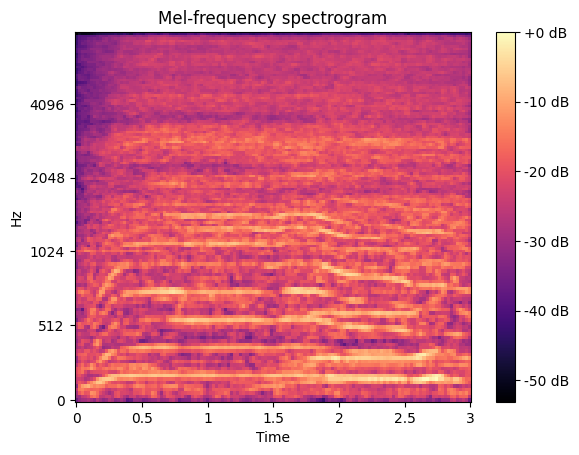

In [21]:
idx = list(np.where(audiofiles['class'] == 'chainsaw')[0])[0]
arr = np.array(audiofiles['slice_file_name'])
fold = np.array(audiofiles['fold'])
cla = np.array(audiofiles['class'])

# Construct the correct local path
path = os.path.join("/home/sanjai/mlprojects/Unisys/data", "fold" + str(fold[idx]), str(arr[idx]))
print(f"Loading file: {path}")  # Debug print

# Load audio if the file exists
if os.path.exists(path):
    data, sampling_rate = librosa.load(path)
    # Compute Mel-spectrogram
    melspec = librosa.feature.melspectrogram(y=data, sr=sampling_rate)
    print("Mel-spectrogram shape:", melspec.shape)
    print("Class:", cla[idx])
    # Play audio
    display(Audio(data=data, rate=sampling_rate))
    
    # Plot Mel-spectrogram
    fig, ax = plt.subplots()
    S_dB = librosa.power_to_db(melspec, ref=np.max)
    img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', 
                                   sr=sampling_rate, fmax=8000, ax=ax)
    fig.colorbar(img, ax=ax, format='%+2.0f dB')
    ax.set(title='Mel-frequency spectrogram')
    plt.show()
else:
    print(f"File not found: {path}")

In [22]:
print(f"Total entries in metadata: {len(audiofiles)}")

Total entries in metadata: 5892


In [23]:
feature = []
label = []
processed_files = []
skipped_files = []

In [24]:
base_dir = "/home/sanjai/mlprojects/Unisys/data"

In [25]:
X = np.array(feature)
y = np.array(label)

In [26]:
print(f"\nProcessed {len(processed_files)} files successfully")
print(f"Skipped {len(skipped_files)} files")
print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")


Processed 0 files successfully
Skipped 0 files
Features shape: (0,)
Labels shape: (0,)


In [27]:
unique_classes = np.unique(audiofiles['class'])
print(f"Unique classes: {unique_classes}")
print(f"Number of classes: {len(unique_classes)}")

Unique classes: ['car_horn' 'chainsaw' 'dog_bark' 'drilling' 'engine_idling' 'footsteps'
 'gun_shot' 'jackhammer' 'radio_human_sound' 'siren' 'weapon_clink']
Number of classes: 11


In [28]:
num_classes = len(audiofiles['class'].unique())
print(f"Number of unique classes: {num_classes}")
print(f"Class names: {audiofiles['class'].unique()}")

Number of unique classes: 11
Class names: ['dog_bark' 'car_horn' 'gun_shot' 'siren' 'engine_idling' 'jackhammer'
 'drilling' 'chainsaw' 'footsteps' 'radio_human_sound' 'weapon_clink']


In [29]:
n_mels = 128  # Number of mel bands
n_fft = 2048  # FFT window size
hop_length = 512  # Hop length for STFT
time_frames = 128  # Fixed number of time frames (adjust based on your data)

In [30]:
X_data = []
y_data = []
base_dir = "/home/sanjai/mlprojects/Unisys/data"

In [31]:
# Process each file in the CSV
for i in range(len(audiofiles)):
    if i % 20 == 0:
        print(f"Processing file {i}/{len(audiofiles)}")
        
    # Try both potential file locations
    filename = os.path.join(base_dir, "fold" + str(audiofiles['fold'][i]), 
                          str(audiofiles['slice_file_name'][i]))
    alt_filename = os.path.join(base_dir, str(audiofiles['slice_file_name'][i]))
    
    if os.path.exists(filename):
        file_to_use = filename
    elif os.path.exists(alt_filename):
        file_to_use = alt_filename
    else:
        print(f"File not found: {audiofiles['slice_file_name'][i]}")
        continue
        
    try:
        # Load audio file
        y, sr = librosa.load(file_to_use, sr=None)
        
        # Extract mel spectrogram
        mel_spec = librosa.feature.melspectrogram(
            y=y, 
            sr=sr, 
            n_fft=n_fft, 
            hop_length=hop_length, 
            n_mels=n_mels
        )
        
        # Convert to dB scale
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
        
        # Handle different audio lengths by either trimming or padding
        if mel_spec_db.shape[1] > time_frames:
            # Trim
            mel_spec_db = mel_spec_db[:, :time_frames]
        elif mel_spec_db.shape[1] < time_frames:
            # Pad with zeros
            padding = time_frames - mel_spec_db.shape[1]
            mel_spec_db = np.pad(mel_spec_db, ((0, 0), (0, padding)), mode='constant')
        
        # Store spectrogram and label
        X_data.append(mel_spec_db)
        y_data.append(audiofiles['classID'][i])
        
    except Exception as e:
        print(f"Error processing {file_to_use}: {e}")

Processing file 0/5892
Processing file 20/5892
Processing file 40/5892
Processing file 60/5892
Processing file 80/5892
Processing file 100/5892
Processing file 120/5892
Processing file 140/5892
Processing file 160/5892
Processing file 180/5892
Processing file 200/5892
Processing file 220/5892
Processing file 240/5892
Processing file 260/5892
Processing file 280/5892
Processing file 300/5892
Processing file 320/5892
Processing file 340/5892
Processing file 360/5892
Processing file 380/5892
Processing file 400/5892
Processing file 420/5892
Processing file 440/5892
Processing file 460/5892
Processing file 480/5892
Processing file 500/5892
Processing file 520/5892
Processing file 540/5892
Processing file 560/5892
Processing file 580/5892
Processing file 600/5892
Processing file 620/5892
Processing file 640/5892
Processing file 660/5892
Processing file 680/5892
Processing file 700/5892
Processing file 720/5892
Processing file 740/5892
Processing file 760/5892
Processing file 780/5892
Proces

/home/sanjai/anaconda3/envs/tf_gpu/lib/python3.10/site-packages/librosa/feature/spectral.py:2148: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


Processing file 1960/5892
Processing file 1980/5892
Processing file 2000/5892
Processing file 2020/5892
Processing file 2040/5892
Processing file 2060/5892
Processing file 2080/5892
Processing file 2100/5892
Processing file 2120/5892
Processing file 2140/5892
Processing file 2160/5892
Processing file 2180/5892
Processing file 2200/5892
Processing file 2220/5892
Processing file 2240/5892
Processing file 2260/5892
Processing file 2280/5892
Processing file 2300/5892
Processing file 2320/5892
Processing file 2340/5892
Processing file 2360/5892
Processing file 2380/5892
Processing file 2400/5892
Processing file 2420/5892
Processing file 2440/5892
Processing file 2460/5892
Processing file 2480/5892
Processing file 2500/5892
Processing file 2520/5892
Processing file 2540/5892
Processing file 2560/5892
Processing file 2580/5892
Processing file 2600/5892
Processing file 2620/5892
Processing file 2640/5892
Processing file 2660/5892
Processing file 2680/5892
Processing file 2700/5892
Processing f

In [32]:
X_data = np.array(X_data)
y_data = np.array(y_data)

In [33]:
X_data = X_data.reshape(X_data.shape[0], X_data.shape[1], X_data.shape[2], 1)

In [34]:
    print(f"Spectrogram data shape: {X_data.shape}")
    print(f"Labels shape: {y_data.shape}")

Spectrogram data shape: (5892, 128, 128, 1)
Labels shape: (5892,)


In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# List of the final 11 classes you're using
valid_classes = ['car_horn', 'chainsaw', 'dog_bark', 'drilling', 'engine_idling',
                 'footsteps', 'gun_shot', 'jackhammer', 'radio_human_sound', 'siren', 'weapon_clink']

# Filter your dataframe to only include these classes
filtered_df = audiofiles[audiofiles['class'].isin(valid_classes)]

# Reset index if needed
filtered_df = filtered_df.reset_index(drop=True)

In [43]:
# Re-encode y_data properly using only valid classes
le = LabelEncoder()
y_data = le.fit_transform(filtered_df['class'])  # Will now be 0 to 10 only
y_categorical = to_categorical(y_data)

In [44]:
# Confirm everything
print("Unique labels after fix:", np.unique(y_data))
print("One-hot shape:", y_categorical.shape)
print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

Unique labels after fix: [ 0  1  2  3  4  5  6  7  8  9 10]
One-hot shape: (5892, 11)
Label mapping: {'car_horn': np.int64(0), 'chainsaw': np.int64(1), 'dog_bark': np.int64(2), 'drilling': np.int64(3), 'engine_idling': np.int64(4), 'footsteps': np.int64(5), 'gun_shot': np.int64(6), 'jackhammer': np.int64(7), 'radio_human_sound': np.int64(8), 'siren': np.int64(9), 'weapon_clink': np.int64(10)}


In [45]:
import numpy as np
print("Unique label values in y_data:", np.unique(y_data))
print("Number of classes:", len(np.unique(y_data)))

Unique label values in y_data: [ 0  1  2  3  4  5  6  7  8  9 10]
Number of classes: 11


In [46]:
X_data = (X_data - X_data.mean()) / X_data.std()

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_categorical, test_size=0.2, random_state=123, stratify=y_data)

In [48]:
print(f'Number of Train Samples: {X_train.shape[0]}')
print(f'Number of Test Samples: {X_test.shape[0]}')

Number of Train Samples: 4713
Number of Test Samples: 1179


In [49]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# 1. Get the unique class names from your dataset (should be 11)
class_names = sorted(audiofiles['class'].unique())  # Ensure only 11 classes
print("Classes in dataset:", class_names)

# 2. Reinitialize and fit the LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(class_names)

# 3. Transform class labels to integers (0 to 10)
y_data = label_encoder.transform(audiofiles['class'])
print(f"Encoded labels shape: {y_data.shape}")
print(f"Unique encoded labels: {np.unique(y_data)}")

# 4. One-hot encode with correct number of classes (11)
y_categorical = to_categorical(y_data, num_classes=len(class_names))
print(f"One-hot encoded labels shape: {y_categorical.shape}")

Classes in dataset: ['car_horn', 'chainsaw', 'dog_bark', 'drilling', 'engine_idling', 'footsteps', 'gun_shot', 'jackhammer', 'radio_human_sound', 'siren', 'weapon_clink']
Encoded labels shape: (5892,)
Unique encoded labels: [ 0  1  2  3  4  5  6  7  8  9 10]
One-hot encoded labels shape: (5892, 11)


In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

In [51]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 1)),
    BatchNormalization(),
    MaxPooling2D(2),
    Dropout(0.2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2),
    Dropout(0.3),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2),
    Dropout(0.4),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])

/home/sanjai/anaconda3/envs/tf_gpu/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1744996433.440675   98031 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9300 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


In [52]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,520,203 (24.87 MB)

 Trainable params: 6,519,243 (24.87 MB)

 Non-trainable params: 960 (3.75 KB)

In [53]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [54]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_audio_cnn_model.keras', monitor='val_accuracy', save_best_only=True)
]

In [55]:
CNN_Model = model.fit( X_train, y_train, epochs=50,batch_size=32,validation_data=(X_test, y_test),callbacks=callbacks, verbose=1)

Epoch 1/50


I0000 00:00:1744996573.774722   98497 service.cc:148] XLA service 0x7f7ae8007060 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744996573.776048   98497 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-04-18 17:16:14.007243: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1744996575.198337   98497 cuda_dnn.cc:529] Loaded cuDNN version 90300


  3/148 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.1632 - loss: 3.5545  

I0000 00:00:1744996582.363620   98497 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


148/148 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.4958 - loss: 1.7659 - val_accuracy: 0.1696 - val_loss: 28.3886
Epoch 2/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.7645 - loss: 0.7469 - val_accuracy: 0.0602 - val_loss: 9.9705
Epoch 3/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8330 - loss: 0.5134 - val_accuracy: 0.4139 - val_loss: 2.7970
Epoch 4/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8542 - loss: 0.4282 - val_accuracy: 0.4377 - val_loss: 4.2714
Epoch 5/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8926 - loss: 0.3433 - val_accuracy: 0.7718 - val_loss: 2.7576
Epoch 6/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9108 - loss: 0.2853 - val_accuracy: 0.9101 - val_loss: 0.5067
Epoch 7/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9180 - loss: 0.2378 - val_accuracy: 0.8821 - val_loss: 0.3536
Epoch 8/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9435 - loss: 0.1609 - val_accuracy: 0.8

In [86]:
model.save('saved_model/my_model_v2.keras')

In [87]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9544 - loss: 0.1641
Test accuracy: 0.9584


In [88]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

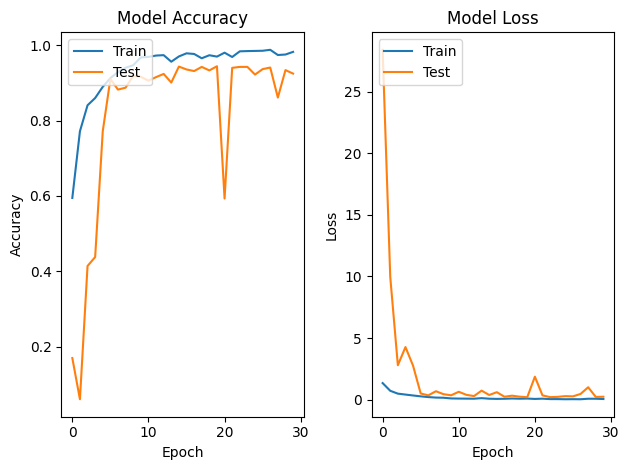

In [89]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(CNN_Model.history['accuracy'])
plt.plot(CNN_Model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(CNN_Model.history['loss'])
plt.plot(CNN_Model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [90]:
def plot_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Normalized Confusion Matrix')
    plt.tight_layout()
    plt.show()

In [91]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [92]:
class_names = audiofiles['class'].unique()

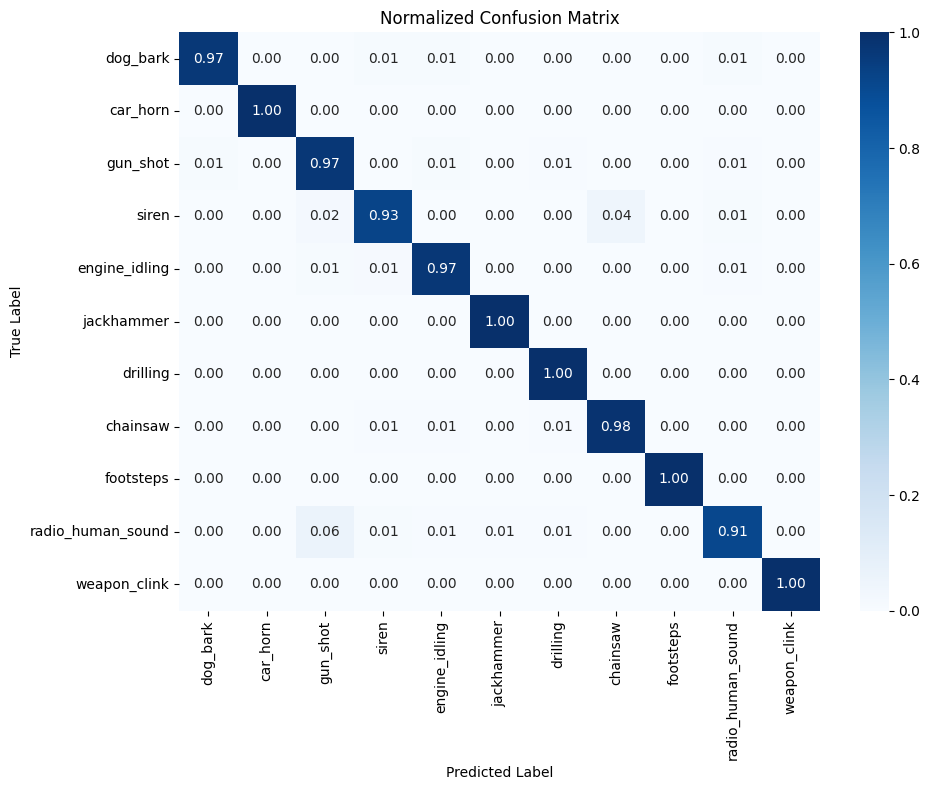

In [93]:
plot_confusion_matrix(y_true_classes, y_pred_classes, class_names)

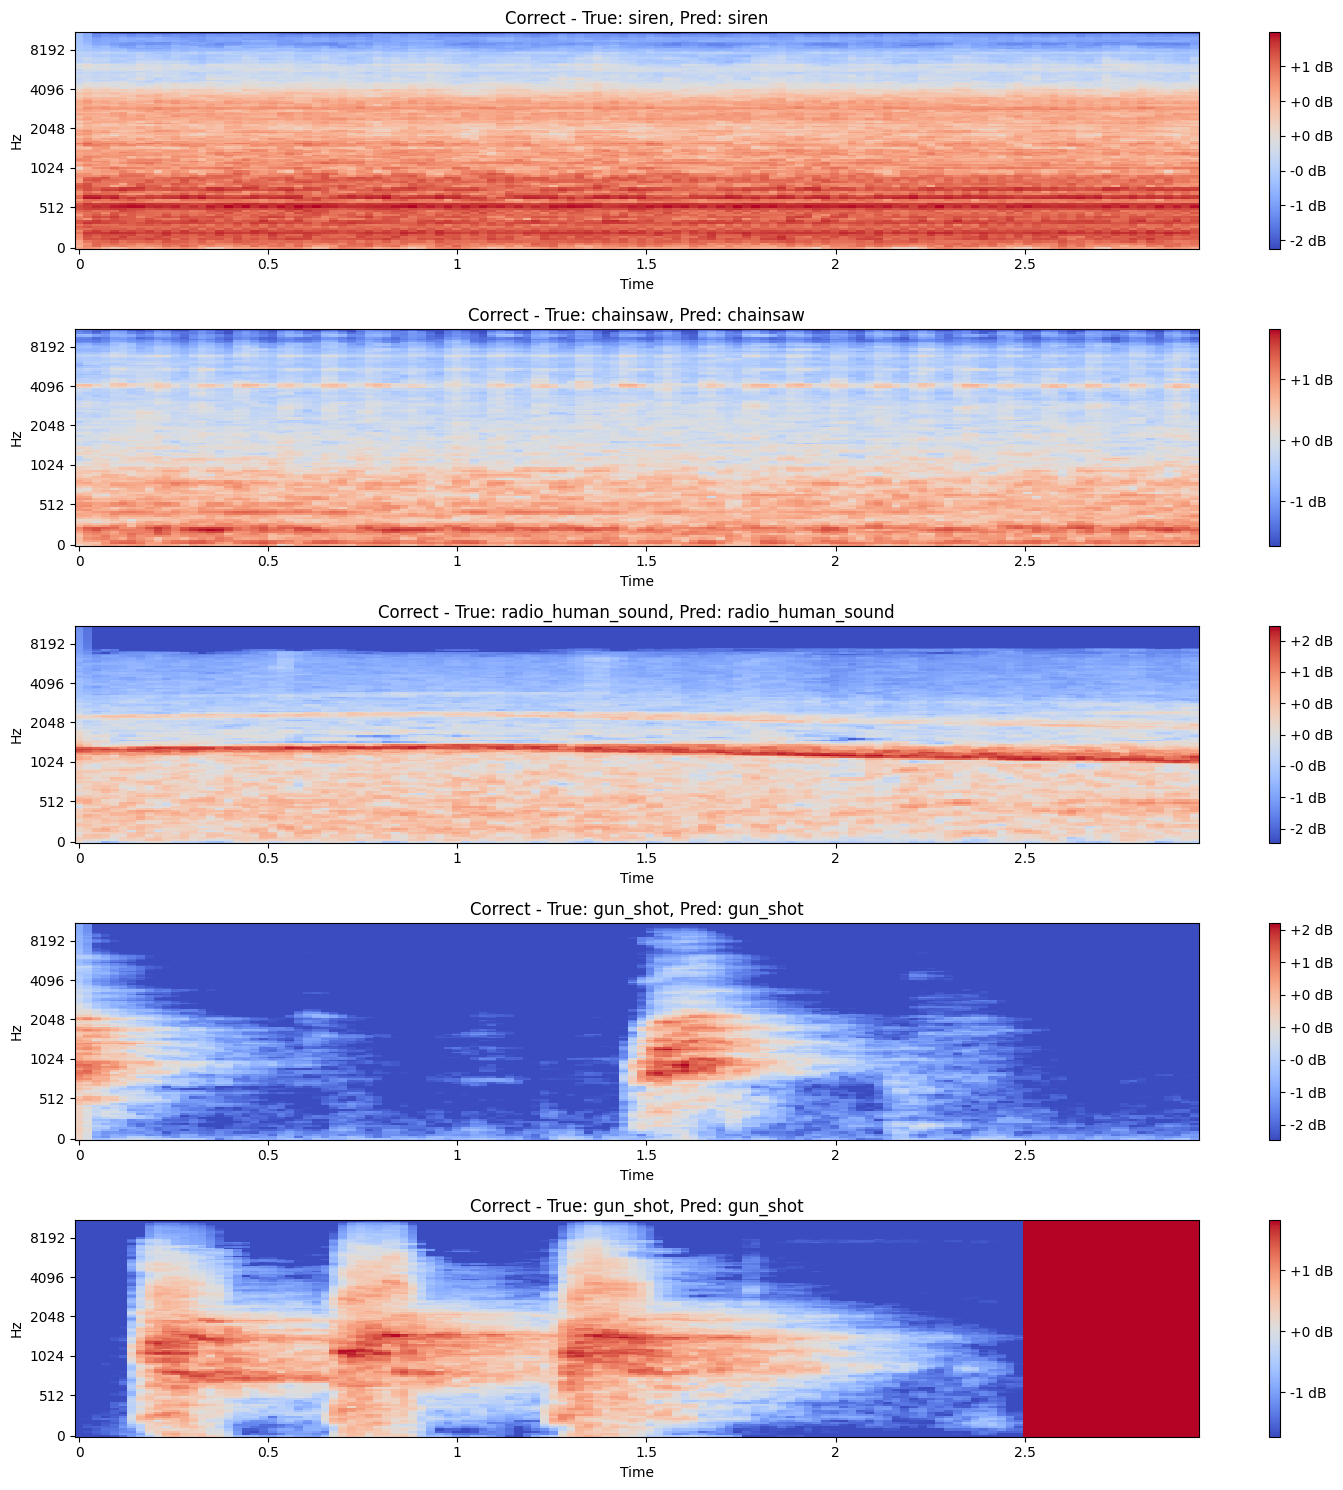

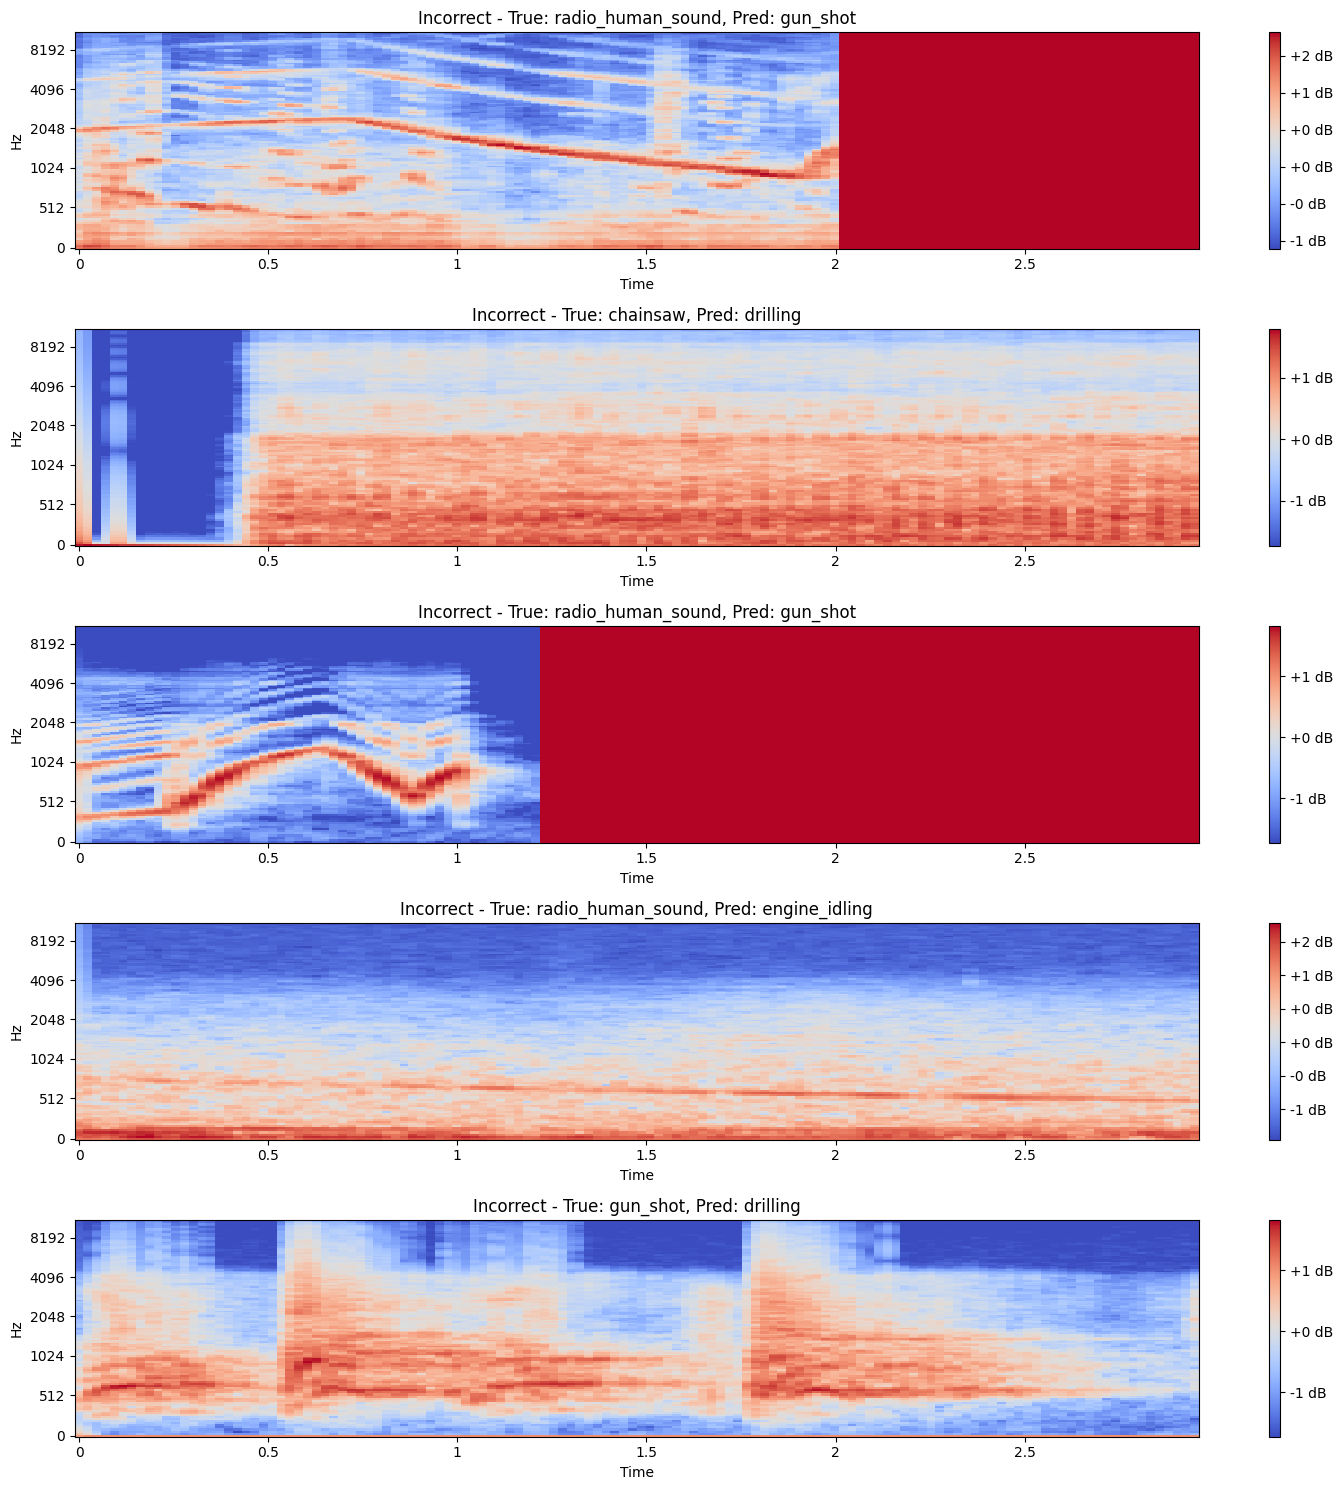

In [94]:
def plot_example_predictions(X, y_true, y_pred, class_names, num_examples=5):
    # Get indices of correctly and incorrectly classified examples
    correct = np.where(y_true == y_pred)[0]
    incorrect = np.where(y_true != y_pred)[0]
    
    # Select random examples (or fewer if not enough available)
    num_correct = min(num_examples, len(correct))
    num_incorrect = min(num_examples, len(incorrect))
    
    correct_indices = np.random.choice(correct, num_correct, replace=False)
    incorrect_indices = np.random.choice(incorrect, num_incorrect, replace=False) if len(incorrect) > 0 else []
    
    # Plot correctly classified examples
    if num_correct > 0:
        plt.figure(figsize=(15, 3*num_correct))
        for i, idx in enumerate(correct_indices):
            plt.subplot(num_correct, 1, i+1)
            # Reshape from (height, width, 1) to (height, width)
            spec = X[idx].reshape(X[idx].shape[0], X[idx].shape[1])
            librosa.display.specshow(spec, x_axis='time', y_axis='mel')
            plt.colorbar(format='%+2.0f dB')
            plt.title(f"Correct - True: {class_names[y_true[idx]]}, Pred: {class_names[y_pred[idx]]}")
        plt.tight_layout()
        plt.show()
    
    # Plot incorrectly classified examples
    if num_incorrect > 0:
        plt.figure(figsize=(15, 3*num_incorrect))
        for i, idx in enumerate(incorrect_indices):
            plt.subplot(num_incorrect, 1, i+1)
            # Reshape from (height, width, 1) to (height, width)
            spec = X[idx].reshape(X[idx].shape[0], X[idx].shape[1])
            librosa.display.specshow(spec, x_axis='time', y_axis='mel')
            plt.colorbar(format='%+2.0f dB')
            plt.title(f"Incorrect - True: {class_names[y_true[idx]]}, Pred: {class_names[y_pred[idx]]}")
        plt.tight_layout()
        plt.show()

# Plot example predictions
plot_example_predictions(X_test, y_true_classes, y_pred_classes, class_names)

In [95]:
import os
print("Current working directory:", os.getcwd())

Current working directory: /home/sanjai/mlprojects/Unisys


In [96]:
import librosa

file_path = "/home/sanjai/mlprojects/Unisys/data/fold11/chainsaws_out_12.wav"

y, sr = librosa.load(file_path, sr=None)  # Or use sr=22050 if you want to resample
print(f"Audio loaded, duration: {len(y)/sr:.2f} seconds")

Audio loaded, duration: 4.00 seconds


In [97]:
import IPython.display as ipd

ipd.Audio(file_path)

In [98]:
import tensorflow as tf

In [99]:
model = tf.keras.models.load_model('saved_model/my_model_v2.keras')

In [100]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,558,691 (74.61 MB)

 Trainable params: 6,519,243 (24.87 MB)

 Non-trainable params: 960 (3.75 KB)

 Optimizer params: 13,038,488 (49.74 MB)

In [101]:
def preprocess_audio(file_path, n_mels=128, n_fft=2048, hop_length=512, time_frames=128):
    """
    Preprocess audio file to match the exact processing used during training
    """
    # Check if file exists
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Audio file not found: {file_path}")
        
    # Load audio file
    try:
        y, sr = librosa.load(file_path, sr=None)  # Use original sampling rate
    except Exception as e:
        raise ValueError(f"Error loading audio file {file_path}: {e}")
    
    # Convert stereo to mono if necessary
    if len(y.shape) > 1:
        y = librosa.to_mono(y)
    
    # Extract mel spectrogram with exactly the same parameters as training
    mel_spec = librosa.feature.melspectrogram(
        y=y, 
        sr=sr, 
        n_fft=n_fft, 
        hop_length=hop_length, 
        n_mels=n_mels
    )
    
    # Convert to dB scale (same as training)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    
    # Handle different audio lengths with same approach as training
    if mel_spec_db.shape[1] > time_frames:
        # Trim to fixed length
        mel_spec_db = mel_spec_db[:, :time_frames]
    elif mel_spec_db.shape[1] < time_frames:
        # Pad with zeros to reach fixed length
        padding = time_frames - mel_spec_db.shape[1]
        mel_spec_db = np.pad(mel_spec_db, ((0, 0), (0, padding)), mode='constant')
    
    # Normalize the spectrogram individually
    mel_spec_db = (mel_spec_db - mel_spec_db.mean()) / (mel_spec_db.std() + 1e-8)
    
    # Reshape to match model input shape: (1, n_mels, time_frames, 1)
    mel_spec_db = mel_spec_db.reshape(1, mel_spec_db.shape[0], mel_spec_db.shape[1], 1)
    
    return mel_spec_db

In [102]:
def predict_audio(file_path, model, class_names=None):
    """
    Process audio file and run prediction with the trained model
    """
    if class_names is None:
        class_names = [
            'dog_bark', 'car_horn', 'gun_shot', 'siren', 'engine_idling',
            'jackhammer', 'drilling', 'chainsaw', 'footsteps',
            'radio_human_sound', 'weapon_clink'
        ]
    
    try:
        # Preprocess the audio with the same parameters used during training
        processed_audio = preprocess_audio(
            file_path, 
            n_mels=128,
            n_fft=2048,
            hop_length=512, 
            time_frames=128
        )
        
        # Run prediction
        prediction = model.predict(processed_audio, verbose=0)
        
        # Get the predicted class
        predicted_class_index = np.argmax(prediction, axis=1)[0]
        predicted_class = class_names[predicted_class_index]
        confidence = prediction[0][predicted_class_index]
        
        print(f"Predicted class: {predicted_class} ({confidence:.2f} confidence)")
        
        return predicted_class, prediction
        
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None, None

In [103]:
def visualize_input(audio_file_path):
    """
    Visualize the audio file and its mel spectrogram to verify preprocessing
    """
    # Load audio
    y, sr = librosa.load(audio_file_path, sr=None)
    
    # Create mel spectrogram
    mel_spec = librosa.feature.melspectrogram(
        y=y, sr=sr, n_fft=2048, hop_length=512, n_mels=128
    )
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    
    # Plot
    plt.figure(figsize=(12, 6))
    
    # Plot waveform
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title(f'Waveform: {os.path.basename(audio_file_path)}')
    
    # Plot mel spectrogram
    plt.subplot(2, 1, 2)
    librosa.display.specshow(mel_spec_db, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram')
    
    plt.tight_layout()
    plt.show()

In [104]:
def test_prediction(audio_file_path, model):
    # Define class names in the correct order matching your model's output
    class_names = [
        'dog_bark', 'car_horn', 'gun_shot', 'siren', 'engine_idling',
        'jackhammer', 'drilling', 'chainsaw', 'footsteps',
        'radio_human_sound', 'weapon_clink'
    ]
    
    # Make prediction
    predicted_class, confidence, probabilities = predict_audio(audio_file_path, model, class_names)
    
    if predicted_class:
        print(f"Predicted class: {predicted_class} ({confidence:.2f} confidence)")
        
        # Show top 3 predictions
        top_3_indices = np.argsort(probabilities)[::-1][:3]
        print("Top 3 predictions:")
        for idx in top_3_indices:
            print(f"{class_names[idx]}: {probabilities[idx]*100:.2f}%")
        
        # Visualize the input for verification
        visualize_input(audio_file_path)
    
    return predicted_class, probabilities

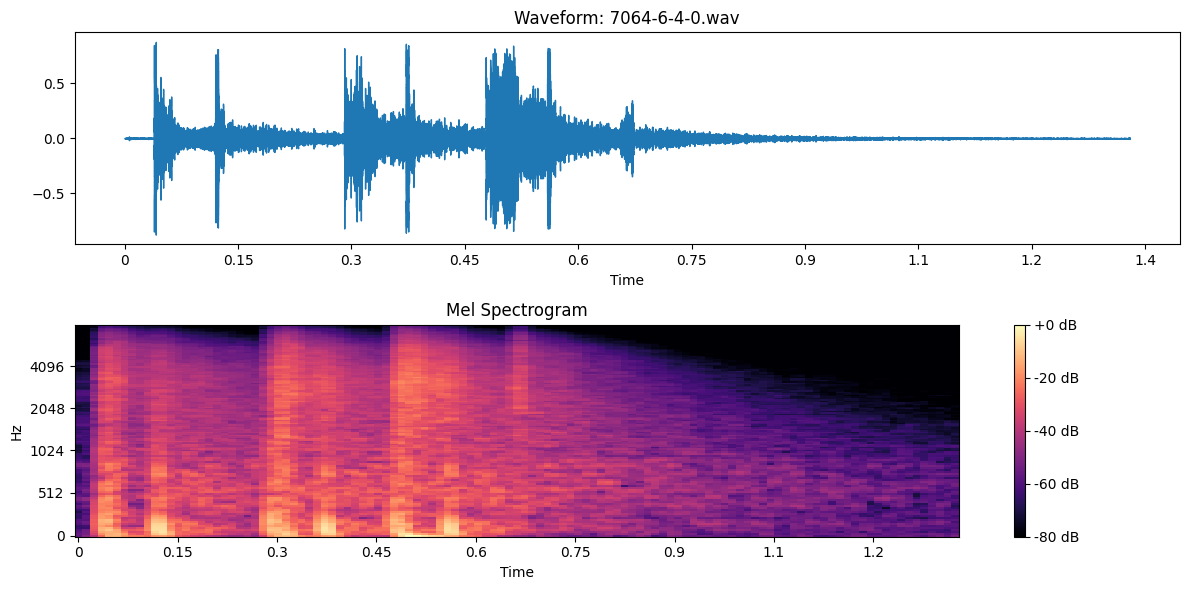

Predicted class: drilling (1.00 confidence)
Top 3 predictions:
drilling: 100.00%
jackhammer: 0.00%
car_horn: 0.00%


In [105]:
class_names = [
    'dog_bark', 'car_horn', 'gun_shot', 'siren', 'engine_idling',
    'jackhammer', 'drilling', 'chainsaw', 'footsteps',
    'radio_human_sound', 'weapon_clink'
]

# --- Run prediction ---
audio_file_path = "/home/sanjai/mlprojects/Unisys/data/fold4/7064-6-4-0.wav"

# Visualize the input to verify preprocessing
visualize_input(audio_file_path)

# Make prediction
predicted_class, probabilities = predict_audio(audio_file_path, model, class_names)

# Show top 3 predictions
if predicted_class:
    top_3_indices = np.argsort(probabilities[0])[::-1][:3]
    print("Top 3 predictions:")
    for idx in top_3_indices:
        print(f"{class_names[idx]}: {probabilities[0][idx]*100:.2f}%")

In [106]:
from IPython.display import Audio

# Path to your audio file
audio_path = "/home/sanjai/mlprojects/Unisys/data/fold4/7064-6-4-0.wav"

# Play the audio
Audio(filename=audio_path)

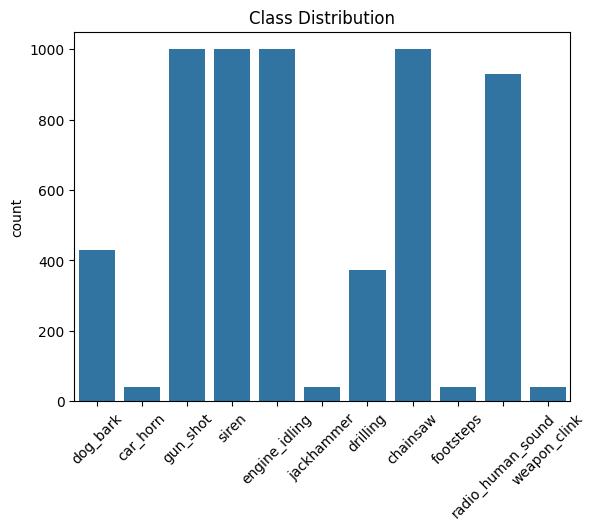

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=y_data)
plt.xticks(ticks=range(len(class_names)), labels=class_names, rotation=45)
plt.title("Class Distribution")
plt.show()

In [108]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_data),
    y=y_data
)

# Create a dictionary {class_index: weight}
class_weight_dict = dict(enumerate(class_weights))

In [109]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_data),
    y=y_data
)

# Create a dictionary {class_index: weight}
class_weight_dict = dict(enumerate(class_weights))

In [110]:
model.fit(X_train, y_train,epochs=50,batch_size=32,validation_data=(X_test, y_test),callbacks=callbacks,class_weight=class_weight_dict,verbose=1)

Epoch 1/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9906 - loss: 0.0150 - val_accuracy: 0.8601 - val_loss: 0.5179
Epoch 2/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9880 - loss: 0.0192 - val_accuracy: 0.9517 - val_loss: 0.1779
Epoch 3/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9917 - loss: 0.0166 - val_accuracy: 0.9415 - val_loss: 0.1966
Epoch 4/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9919 - loss: 0.0173 - val_accuracy: 0.9381 - val_loss: 0.2195
Epoch 5/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9915 - loss: 0.0142 - val_accuracy: 0.9466 - val_loss: 0.2071
Epoch 6/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9921 - loss: 0.0143 - val_accuracy: 0.9550 - val_loss: 0.1662
Epoch 7/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9905 - loss: 0.0169 - val_accuracy: 0.9534 - val_loss: 0.2639
Epoch 8/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9924 - loss: 0.0154 - val_accu

In [111]:
from sklearn.metrics import classification_report

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred, target_names=class_names))

37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step 
                   precision    recall  f1-score   support

         dog_bark       0.94      0.99      0.97        86
         car_horn       1.00      1.00      1.00         8
         gun_shot       0.93      0.94      0.93       200
            siren       0.95      0.95      0.95       200
    engine_idling       0.97      0.97      0.97       200
       jackhammer       1.00      1.00      1.00         8
         drilling       0.97      0.96      0.97        75
         chainsaw       0.96      0.98      0.97       200
        footsteps       1.00      1.00      1.00         8
radio_human_sound       0.98      0.94      0.96       186
     weapon_clink       1.00      0.88      0.93         8

         accuracy                           0.96      1179
        macro avg       0.97      0.96      0.97      1179
     weighted avg       0.96      0.96      0.96      1179



In [112]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_data), y=y_data)
class_weight_dict = dict(enumerate(class_weights))

In [85]:
model.fit(X_train, y_train,epochs=50, batch_size=32,validation_data=(X_test, y_test),callbacks=callbacks,class_weight=class_weight_dict,verbose=1) # Train with class weights

Epoch 1/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9788 - loss: 0.0390 - val_accuracy: 0.9296 - val_loss: 0.2407
Epoch 2/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9820 - loss: 0.0353 - val_accuracy: 0.9347 - val_loss: 0.2026
Epoch 3/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9843 - loss: 0.0276 - val_accuracy: 0.9296 - val_loss: 0.2188
Epoch 4/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9877 - loss: 0.0203 - val_accuracy: 0.9381 - val_loss: 0.4909
Epoch 5/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9821 - loss: 0.0354 - val_accuracy: 0.9186 - val_loss: 0.2787
Epoch 6/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9725 - loss: 0.0476 - val_accuracy: 0.9025 - val_loss: 0.3723
Epoch 7/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9814 - loss: 0.0520 - val_accuracy: 0.9483 - val_loss: 0.2080
Epoch 8/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9741 - loss: 0.0615 - val_accu

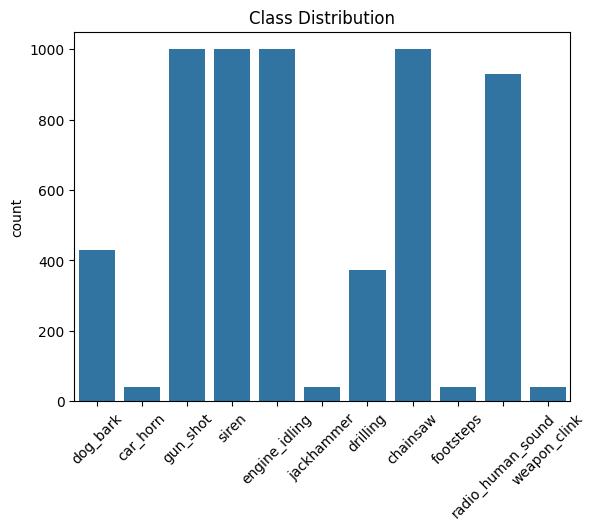

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=y_data)
plt.xticks(ticks=range(len(class_names)), labels=class_names, rotation=45)
plt.title("Class Distribution")
plt.show()

In [116]:
import numpy as np
import librosa
import os
import matplotlib.pyplot as plt

def preprocess_audio_exact(file_path, model_input_shape=(128, 128), sr=22050):
    """
    Preprocess audio with exact same steps used during training
    
    Parameters:
    - file_path: Path to audio file
    - model_input_shape: Tuple (n_mels, time_frames) matching model input
    - sr: Sample rate used during training
    """
    print(f"Processing file: {file_path}")
    
    # Step 1: Load audio with consistent sample rate
    y, original_sr = librosa.load(file_path, sr=None)
    print(f"Original sample rate: {original_sr}")
    
    # Resample to match training if needed
    if original_sr != sr:
        print(f"Resampling from {original_sr} to {sr}")
        y = librosa.resample(y, orig_sr=original_sr, target_sr=sr)
    
    # Step 2: Convert to mono if needed
    if len(y.shape) > 1:
        print("Converting stereo to mono")
        y = librosa.to_mono(y)
    
    # Step 3: Display waveform stats for debugging
    print(f"Audio duration: {len(y)/sr:.2f}s, min: {y.min():.4f}, max: {y.max():.4f}, mean: {y.mean():.4f}")
    
    # Step 4: Extract mel spectrogram with identical parameters as training
    n_mels, time_frames = model_input_shape
    mel_spec = librosa.feature.melspectrogram(
        y=y, 
        sr=sr, 
        n_fft=2048,  # Must match training
        hop_length=512,  # Must match training
        n_mels=n_mels
    )
    
    # Step 5: Convert to dB scale
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    print(f"Mel spectrogram shape before resize: {mel_spec_db.shape}")
    
    # Step 6: Handle different audio lengths by either trimming or padding
    if mel_spec_db.shape[1] > time_frames:
        print(f"Trimming spectrogram from {mel_spec_db.shape[1]} to {time_frames} frames")
        mel_spec_db = mel_spec_db[:, :time_frames]
    elif mel_spec_db.shape[1] < time_frames:
        print(f"Padding spectrogram from {mel_spec_db.shape[1]} to {time_frames} frames")
        padding = time_frames - mel_spec_db.shape[1]
        mel_spec_db = np.pad(mel_spec_db, ((0, 0), (0, padding)), mode='constant')
    
    # Step 7: Normalize the spectrogram (same as training)
    mel_spec_db_mean = mel_spec_db.mean()
    mel_spec_db_std = mel_spec_db.std()
    mel_spec_db = (mel_spec_db - mel_spec_db_mean) / (mel_spec_db_std + 1e-8)
    print(f"Normalized spectrogram - mean: {mel_spec_db.mean():.4f}, std: {mel_spec_db.std():.4f}")
    
    # Step 8: Reshape to match model input shape
    mel_spec_db = mel_spec_db.reshape(1, mel_spec_db.shape[0], mel_spec_db.shape[1], 1)
    print(f"Final shape: {mel_spec_db.shape}")
    
    # Visualize the spectrogram for verification
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title('Waveform')
    
    plt.subplot(1, 2, 2)
    # Show the processed spectrogram but reshape back for visualization
    librosa.display.specshow(mel_spec_db[0, :, :, 0], y_axis='mel', x_axis='time', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Processed Mel Spectrogram')
    plt.tight_layout()
    plt.show()
    
    return mel_spec_db

def predict_with_debug(file_path, model, class_names, sample_rate=22050):
    """
    Make prediction with extensive debugging information
    """
    # Process audio
    processed_audio = preprocess_audio_exact(file_path, model_input_shape=(128, 128), sr=sample_rate)
    
    # Make prediction
    print("Running model prediction...")
    prediction = model.predict(processed_audio, verbose=1)
    
    # Get the top prediction
    predicted_class_index = np.argmax(prediction[0])
    predicted_class = class_names[predicted_class_index]
    confidence = prediction[0][predicted_class_index]
    
    print(f"\nPrediction Results:")
    print(f"Predicted class: {predicted_class} ({confidence:.4f} confidence)")
    
    # Show all class probabilities
    print("\nAll class probabilities:")
    for i, class_name in enumerate(class_names):
        print(f"{class_name}: {prediction[0][i]*100:.4f}%")
    
    # Show top 3 predictions
    top_3_indices = np.argsort(prediction[0])[::-1][:3]
    print("\nTop 3 predictions:")
    for idx in top_3_indices:
        print(f"{class_names[idx]}: {prediction[0][idx]*100:.4f}%")
    
    return predicted_class, prediction

Processing file: /home/sanjai/mlprojects/Unisys/data/fold4/7064-6-4-0.wav
Original sample rate: 44100
Resampling from 44100 to 22050
Audio duration: 1.33s, min: -0.8530, max: 0.8223, mean: 0.0018
Mel spectrogram shape before resize: (128, 58)
Padding spectrogram from 58 to 128 frames
Normalized spectrogram - mean: 0.0000, std: 1.0000
Final shape: (1, 128, 128, 1)


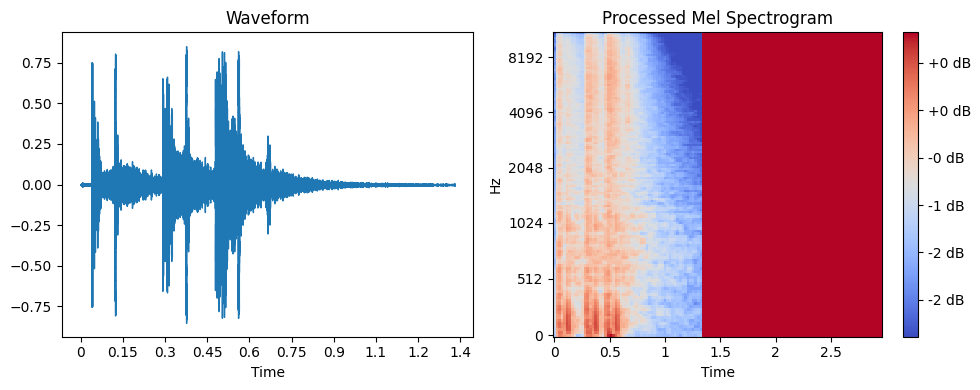

Running model prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

Prediction Results:
Predicted class: drilling (0.9311 confidence)

All class probabilities:
dog_bark: 0.0000%
car_horn: 0.0000%
gun_shot: 6.8915%
siren: 0.0007%
engine_idling: 0.0000%
jackhammer: 0.0018%
drilling: 93.1053%
chainsaw: 0.0000%
footsteps: 0.0007%
radio_human_sound: 0.0000%
weapon_clink: 0.0000%

Top 3 predictions:
drilling: 93.1053%
gun_shot: 6.8915%
jackhammer: 0.0018%


In [118]:
# Define your class names (make sure they're in the correct order matching model output)
class_names = [
    'dog_bark', 'car_horn', 'gun_shot', 'siren', 'engine_idling',
    'jackhammer', 'drilling', 'chainsaw', 'footsteps',
    'radio_human_sound', 'weapon_clink'
]

# Path to your gunshot audio
gunshot_file = "/home/sanjai/mlprojects/Unisys/data/fold4/7064-6-4-0.wav"

# Run prediction with detailed debugging
predicted_class, probabilities = predict_with_debug(gunshot_file, model, class_names)